# Image Segmentation:

https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/

### Region-based Segmentation

If we want to divide the image into two regions (object and background), we define a single threshold value. This is known as the global threshold.

If we have multiple objects along with the background, we must define multiple thresholds. These thresholds are collectively known as the local threshold.

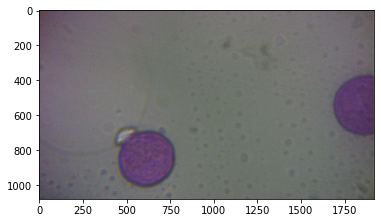

In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
##########################################################
#Let’s read the downloaded image and plot it:
##########################################################
image = plt.imread('Muestra1.jpg')
image.shape
plt.imshow(image)

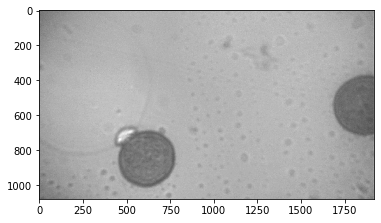

In [2]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [3]:
gray.shape #threshold

(1080, 1920)

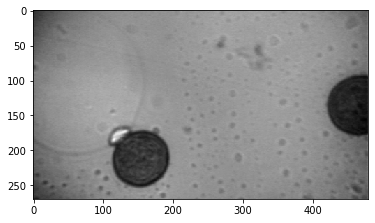

In [8]:
image=cv2.resize(image,(480,270))#resize image
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

This threshold should separate the image into two parts (the foreground and the background).

We will take the mean of the pixel values and use that as a threshold. If the pixel value is more than our threshold, we can say that it belongs to an object. If the pixel value is less than the threshold, it will be treated as the background. Let’s code this:

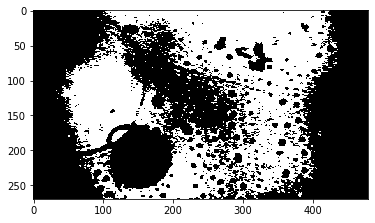

In [9]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]): #Nº iter = Nº píxeles de la img
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

We can define multiple thresholds as well to detect multiple objects:

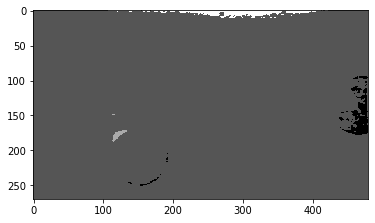

In [10]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

### Edge Detection Segmentation

##### Sobel filter:

In [11]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')

sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


Now, convolve this filter over the image using the convolve function of the ndimage package from scipy

Img with sobel horizontal filter


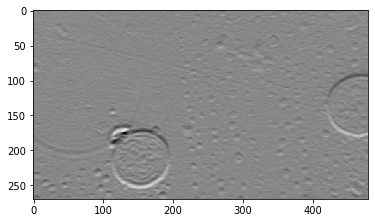

In [13]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

print('Img with sobel horizontal filter')
plt.imshow(out_h, cmap='gray')

Img with sobel vertical filter


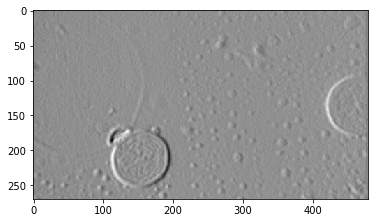

In [14]:
print('Img with sobel vertical filter')
plt.imshow(out_v, cmap='gray')

##### Laplace operator:

Here, we are able to identify the horizontal as well as the vertical edges. 

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


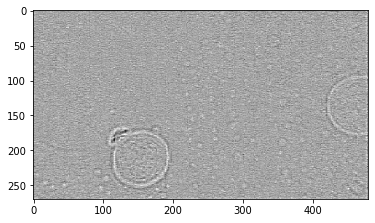

In [15]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

### Image Segmentation based on Clustering

Clustering is the task of dividing the population (data points) into a number of groups, such that data points in the same groups are more similar to other data points in that same group than those in other groups. These groups are known as clusters.

(1080, 1920, 3)


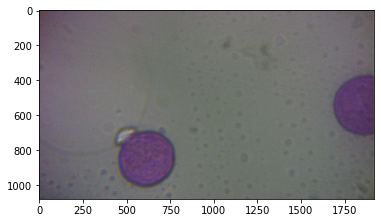

In [16]:
pic = plt.imread('Muestra1.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels). 

In [17]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(2073600, 3)

We can see that the image has been converted to a 2-dimensional array. Next, fit the k-means algorithm on this reshaped array and obtain the clusters. The cluster_centers_ function of k-means will return the cluster centers and labels_ function will give us the label for each pixel (it will tell us which pixel of the image belongs to which cluster).

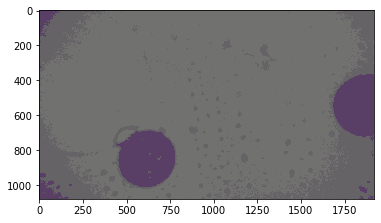

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

#Reshape the image to 3D-img and plot it
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

### Mask R-CNN

Mask R-CNN es una extensión de la popular arquitectura de detección de objetos, Faster R-CNN. La máscara R-CNN agrega una rama a las salidas Faster R-CNN ya existentes. El método Faster R-CNN genera dos cosas para cada objeto en la imagen:

>Su clase

>Las coordenadas del cuadro delimitador.